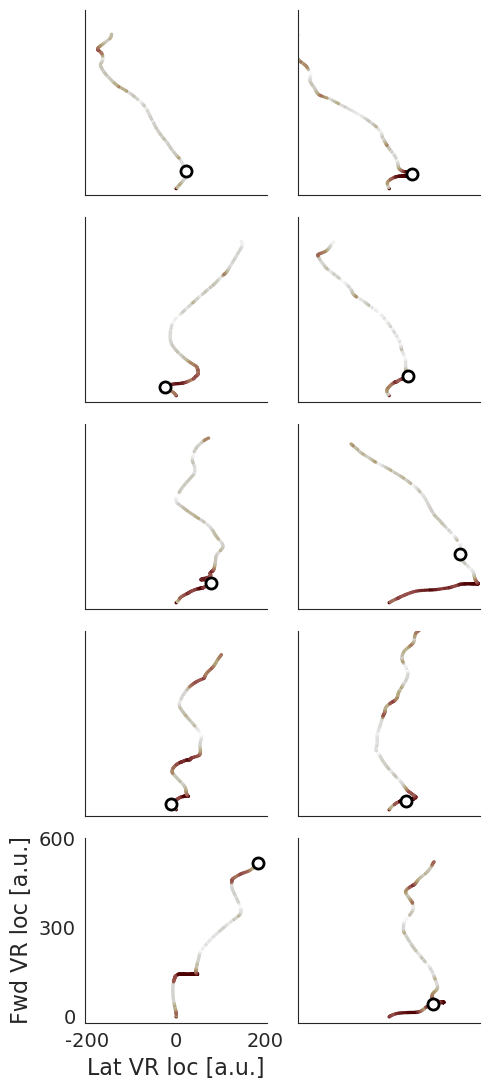

In [179]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri as cmc
import reaction_time as reac
import pandas as pd

cols_macaque = sns.color_palette(np.array(['#7695B8','#68c3ffff', "#3171eb", "#3e4752ff"]))
cols_mouse = sns.color_palette(np.array(["#5E3C18", "#F5993D", "#A8612A"]))

# Define the animal
animal = 'mouse'
newSamp = 60
# Load log, flash, face, and eye files
with open('RawData/Mouse/files_logs_mouse_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]

sess_data = reac.sess_data_maker(files_logs[1], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4

fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize=(5,11))
st = 10
for i in range(st, st+10):
    rt = int(r_time[i]*60)
    axi = ax.flat[i-st]
    axi.scatter(sess_data[i,1], sess_data[i,0], marker = 'o', s = 2, c = np.hstack([0, np.diff(sess_data[i,0])]), alpha = 1, cmap = 'cmc.bilbao_r')
    axi.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1, ms = 8)
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim([-205, 205])
    axi.set_ylim([-20, 600])
    if i == st+8:
        axi.set_xlabel("Lat VR loc [a.u.]", fontsize = 16)
        axi.set_ylabel("Fwd VR loc [a.u.]", fontsize = 16)
        axi.set_yticks(np.linspace(0, 600, 3), np.linspace(0, 600, 3).astype(int), fontsize = 14)
        axi.set_xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 14)

sns.despine()
plt.tight_layout()

/tmp/ipykernel_351728/2169183564.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


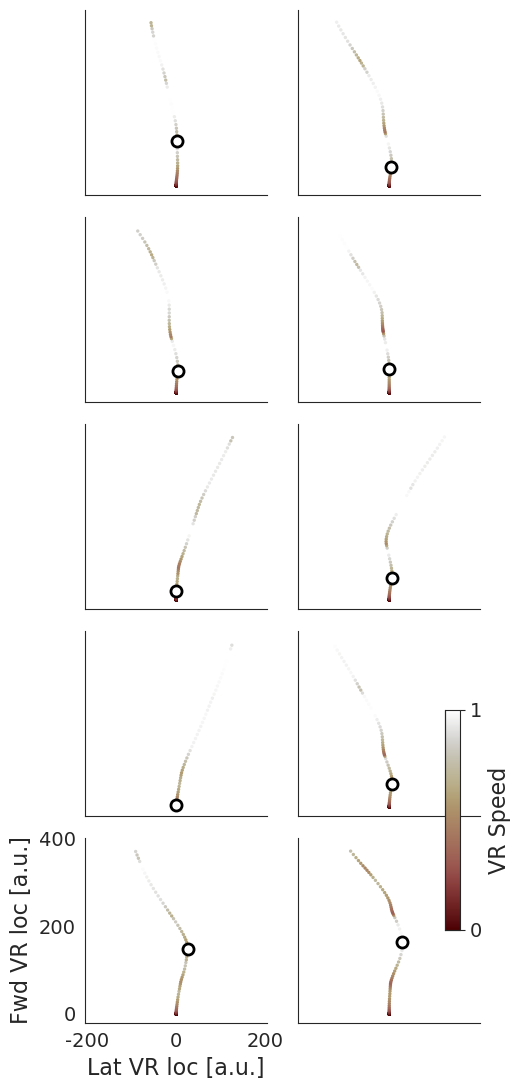

In [190]:
# Import necessary libraries
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# Define the animal
animal = 'macaque'

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]

sess_data = reac.sess_data_maker(files_logs[1], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4


fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize=(5,11))
st = 10
cmap = plt.get_cmap('cmc.bilbao_r') # Get the colormap

for i in range(st, st+10):
    rt = int(r_time[i]*60)
    axi = ax.flat[i-st]
    axi.scatter(sess_data[i,1], sess_data[i,0], marker = 'o', s = 2, c = np.hstack([0, np.diff(sess_data[i,0])]), alpha = 1, cmap = cmap)
    axi.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1, ms = 8)
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim([-205, 205])
    axi.set_ylim([-20, 400])
    if i == st+8:
        axi.set_xlabel("Lat VR loc [a.u.]", fontsize = 16)
        axi.set_ylabel("Fwd VR loc [a.u.]", fontsize = 16)
        axi.set_yticks(np.linspace(0, 400, 3), np.linspace(0, 400, 3).astype(int), fontsize = 14)
        axi.set_xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 14)

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.2]) # adjust the size and position as needed
norm = Normalize(vmin=0, vmax=1)
cb = ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')
cb.set_label('VR Speed', fontsize = 16)
cb.set_ticks([0, 1])
cb.set_ticklabels(['0', '1'], fontsize = 14)
sns.despine()
plt.tight_layout()

In [23]:
# Import necessary libraries
import numpy as np
from parse_logfile_newest import TextLog
import seaborn as sns
import BehavUtils as butils
import reaction_time as reac
import matplotlib.pyplot as plt

# Define the animal
animal = 'macaque'

# Load log, flash, face, and eye files
with open('RawData/Macaque/files_logs_macaque_moreSes.txt') as f:
    files_logs = [line.strip() for line in f.readlines()]
evt, newSamp, nPoints, t_final, idx_start, idx_stim, _ = butils.readLog(files_logs[0], animal)
sess_data = reac.sess_data_maker(files_logs[0], animal, 3000)
r_time, _ = reac.reaction_time(sess_data, [5,10,15])
r_time[pd.isna(r_time)] = -1
r_time = r_time.astype(np.float64)
r_time = r_time / newSamp
r_time[r_time > 4] = 4

Had to increase array size
N frames missed: 24
Increased all_ids size
AnimalCharacter_C_2147482442
Had to increase array size
N frames missed: 24
Increased all_ids size


/gs/home/tlaieboriaa/.conda/envs/Cluster-GLMHMM3/lib/python3.9/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


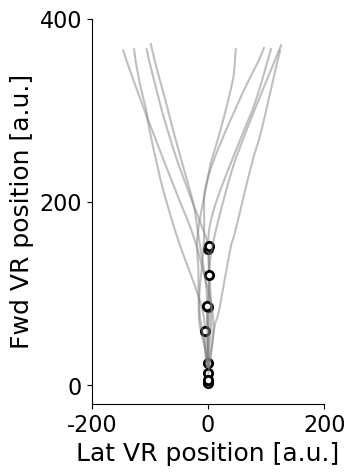

In [26]:
plt.figure(figsize=(3,5))
for i in range(10):
    rt = int(r_time[i]*60)
    plt.plot(sess_data[i,1],sess_data[i,0],"gray", alpha = 0.5)
    plt.plot([sess_data[i,1][rt]],[sess_data[i,0][rt]], "black",marker = 'o', mfc = 'white', mew = 2, alpha = 1)
plt.xlim([-200, 200])
plt.ylim([-20, 400])
plt.xlabel("Lat VR position [a.u.]", fontsize = 18)
plt.ylabel("Fwd VR position [a.u.]", fontsize = 18)
plt.yticks(np.linspace(0, 400, 3), np.linspace(0, 400, 3).astype(int), fontsize = 16)
plt.xticks(np.linspace(-200, 200, 3), np.linspace(-200, 200, 3).astype(int), fontsize = 16)
sns.despine()

plt.savefig("Paths_Examples_macaque_23062023.svg")

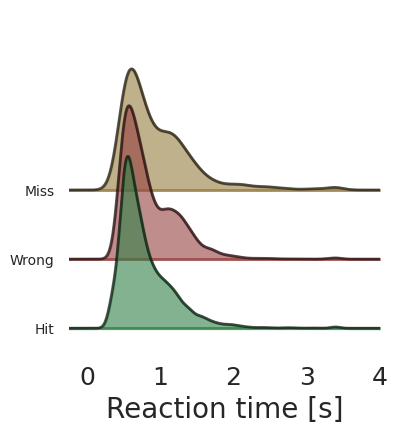

In [135]:
import joypy
colors2 = ['black', sns.desaturate("#E0655D", 0.5), sns.desaturate('#45A16A', 0.5)]# Set your custom color palette

vals1 = np.array(rt_mouse_miss[~np.isnan(rt_mouse_miss)], dtype = np.float32)
dftry = pd.DataFrame(vals1, columns = ['Miss'])

vals2 = np.array(rt_mouse_wrong[~np.isnan(rt_mouse_wrong)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals2, columns = ['Wrong'])])

vals3 = np.array(rt_mouse_hit[~np.isnan(rt_mouse_hit)], dtype = np.float32)
dftry = pd.concat([dftry, pd.DataFrame(vals3, columns = ['Hit'])])

fig, axes = joypy.joyplot(dftry, color = cols_outc[::-1], alpha = 0.6, figsize = (4,4), overlap = 2, lw = 2)

plt.xlabel('Reaction time [s]', fontsize = 20)
plt.xlim([-0.25, 4])
plt.xticks(np.arange(5), np.arange(5), fontsize = 18)